# Explore BirdNET logs

- https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html
- https://towardsdatascience.com/enhance-your-polar-bar-charts-with-matplotlib-c08e332ec01c
- https://plotly.com/python/wind-rose-charts/
- https://gist.github.com/phobson/41b41bdd157a2bcf6e14



In [277]:
import json
from pathlib import Path
from glob import glob
from tqdm import tqdm
import pandas
from datetime import datetime, timedelta
import dateutil.parser

import calplot
import numpy

In [2]:
log_paths = glob("logs/*", recursive=True)
print("log_paths:", len(log_paths))

log_paths: 232


In [3]:
log = []
for log_path in tqdm(log_paths):
    try:
        lines = open(log_path).readlines()
        log += [json.loads(line) for line in lines]
    except:
        print("failed:", log_path)

print("log:", len(log), log[0])

100%|██████████| 232/232 [01:03<00:00,  3.64it/s]

log: 3833299 {'msg': 'success', 'results': [['Numenius phaeopus_Whimbrel', 0.0403], ['Calidris alba_Sanderling', 0.0401], ['Falco peregrinus_Peregrine Falcon', 0.0387]], 'filename': '20230801T235955+1000', 'skipped': 0, 'oldest': '20230801T235955+1000', 'timestamp': '2023-08-01T23:59:55+10:00', 'hour_of_day': '23'}


In [4]:
# Convert to df
raw = pandas.DataFrame.from_records(log)
raw['timestamp'] = pandas.to_datetime(raw['timestamp'])

In [5]:
# Cleanup
raw = raw[raw['msg'] == 'success'].copy()
raw = raw.explode(['results'])

In [6]:
raw[['name','confidence']] = pandas.DataFrame(raw.results.tolist(), index=raw.index)
raw[['species', 'common']] = raw['name'].str.split("_", expand = True)
raw.drop(columns=['msg', 'results', 'filename', 'oldest', 'name'], inplace=True)
raw

,skipped,timestamp,hour_of_day,confidence,species,common
0,0,2023-08-01 23:59:55+10:00,23,0.0403,Numenius phaeopus,Whimbrel
0,0,2023-08-01 23:59:55+10:00,23,0.0401,Calidris alba,Sanderling
0,0,2023-08-01 23:59:55+10:00,23,0.0387,Falco peregrinus,Peregrine Falcon
1,0,2023-08-02 00:00:00+10:00,00,0.0318,Fulica atra,Eurasian Coot
1,0,2023-08-02 00:00:00+10:00,00,0.0317,Calidris alba,Sanderling
...,...,...,...,...,...,...
3833297,0,2023-08-01 23:59:45+10:00,23,0.0321,Psophodes olivaceus,Eastern Whipbird
3833297,0,2023-08-01 23:59:45+10:00,23,0.0317,Platycercus elegans,Crimson Rosella
3833298,0,2023-08-01 23:59:50+10:00,23,0.0321,Falco peregrinus,Peregrine Falcon
3833298,0,2023-08-01 23:59:50+10:00,23,0.0276,Turdus merula,Eurasian Blackbird


<Axes: ylabel='common'>

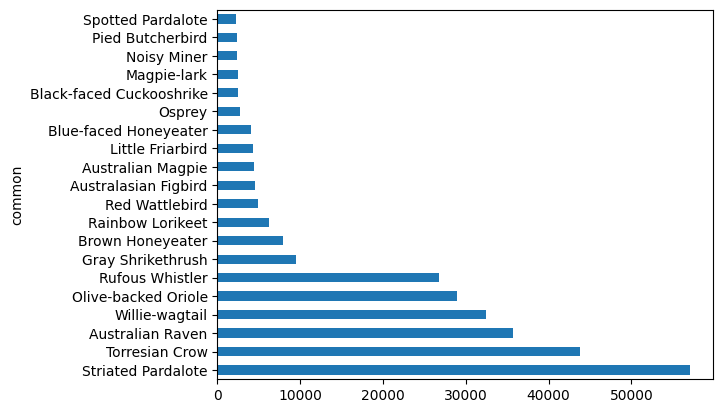

In [281]:
# timestamp = dateutil.parser.parse("2023-01-01 00:00 +10:00")
# df = raw.query('confidence > 0.3 and timestamp < @timestamp', engine='python')
df = raw.query('confidence > 0.3', engine='python')

# Plot top species
df.common.value_counts().nlargest(20).plot(kind='barh')

In [282]:
df.set_index('timestamp', inplace=True)


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1600x800 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


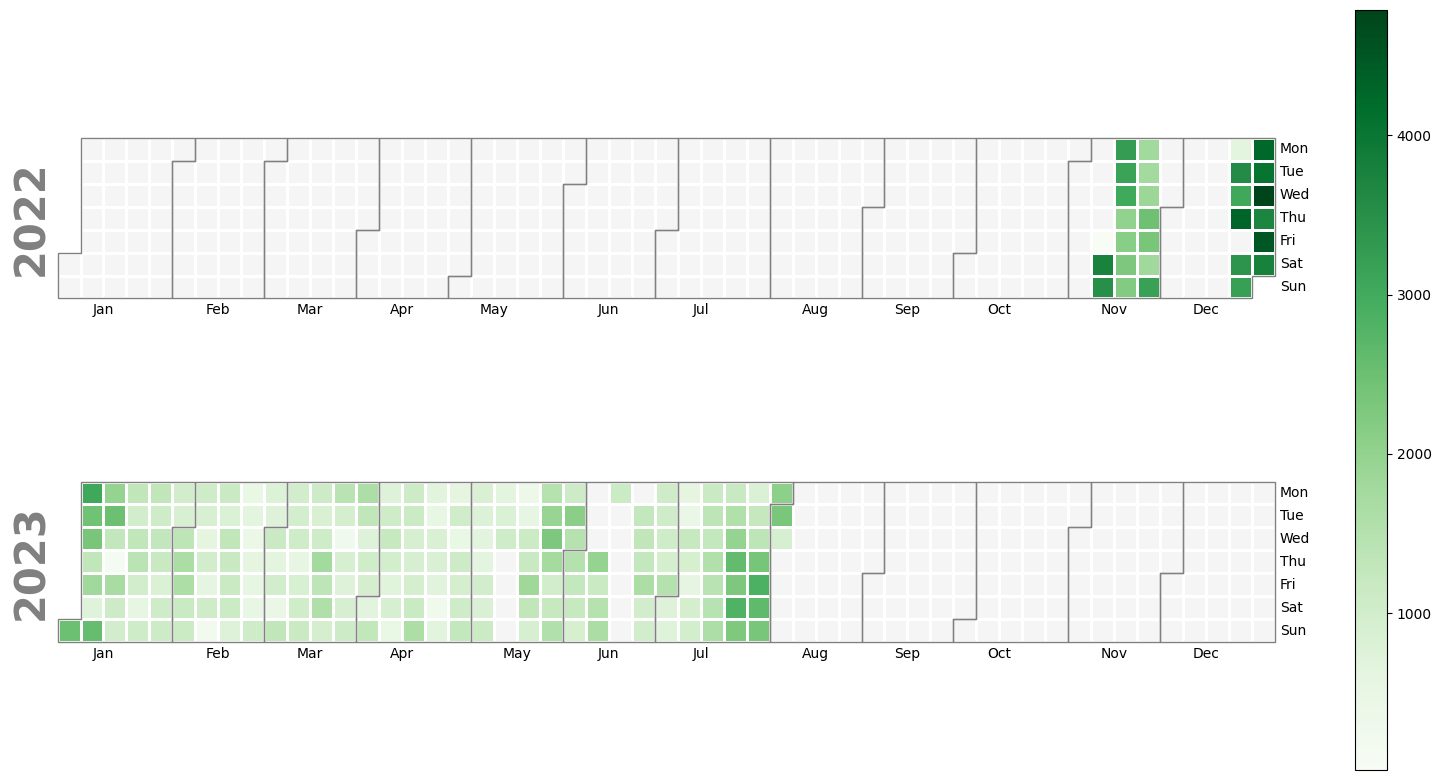

In [283]:
data = df.copy().groupby(df.index.date).count()
data.index = pandas.to_datetime(data.index)
calplot.calplot(data=data['species'], how=None, cmap = 'Greens', figsize = (16, 8))
# calplot.yearplot(year=2023, data=data['species'], how=None, cmap = 'Reds')#, figsize = (16, 8))


In [284]:
df

,skipped,hour_of_day,confidence,species,common
timestamp,,,,,
2023-08-02 00:01:45+10:00,0,00,0.3391,Falco peregrinus,Peregrine Falcon
2023-08-02 00:24:41+10:00,0,00,0.6976,Vanellus miles,Masked Lapwing
2023-08-02 00:24:46+10:00,0,00,0.5779,Vanellus miles,Masked Lapwing
2023-08-02 00:25:46+10:00,0,00,0.3281,Falco peregrinus,Peregrine Falcon
2023-08-02 00:31:31+10:00,0,00,0.3063,Vanellus miles,Masked Lapwing
...,...,...,...,...,...
2023-08-01 23:51:50+10:00,0,23,0.3144,Falco peregrinus,Peregrine Falcon
2023-08-01 23:53:55+10:00,0,23,0.7989,Vanellus miles,Masked Lapwing
2023-08-01 23:54:00+10:00,0,23,0.7036,Vanellus miles,Masked Lapwing


In [296]:
import numpy
from matplotlib import pyplot

def clock_rose(rosedata, species, palette=None):
    hours = [h for h in range(0, 24)]
    hours24 = numpy.asarray([f"{_:02}:00" for _ in hours])

    if palette is None:
        palette = seaborn.color_palette('inferno', n_colors=rosedata.shape[1])

    N = len(hours)
    theta = numpy.linspace(0, 2*numpy.pi, N, endpoint=False)
    # radii = 10 * numpy.random.rand(N)
    width = numpy.pi * 2 / N

    fig, ax = pyplot.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    ax.set_title(species)
    ax.set_theta_direction('clockwise')
    ax.set_theta_zero_location('N')

    for n, (c1, c2) in enumerate(zip(rosedata.columns[:-1], rosedata.columns[1:])):
        if n == 0:
            # first column only
            ax.bar(theta, rosedata[c1].values, 
                   width=width,
                   color=palette[0],
                   edgecolor='none',
                   label=c1,
                   linewidth=0)

        # all other columns
        ax.bar(theta, rosedata[c2].values, 
               width=width, 
               bottom=rosedata.cumsum(axis=1)[c1].values,
               color=palette[n+1],
               edgecolor='none',
               label=c2,
               linewidth=0)

    leg = ax.legend(loc=(0.8, 0.95), ncol=2)
    ax.set_xticks(theta)
    xtl = ax.set_xticklabels(hours24)

    return fig


In [286]:
# Calculate count of species by minute
df_minute = (
    df
    .drop(['species'], axis='columns')
    .groupby([df.index.map(lambda x: x.replace(second=0)), 'common'])['common']
    .value_counts()
    # .unstack()
    .fillna(0)
    .astype(int)
    .reset_index()
)
df_minute

,timestamp,common,count
0,2022-11-11 23:06:00+10:00,Rufous Whistler,1
1,2022-11-11 23:06:00+10:00,Willie-wagtail,2
2,2022-11-11 23:07:00+10:00,Willie-wagtail,1
3,2022-11-11 23:44:00+10:00,Willie-wagtail,3
4,2022-11-11 23:46:00+10:00,Willie-wagtail,2
...,...,...,...
131201,2023-08-02 14:52:00+10:00,Spotted Pardalote,1
131202,2023-08-02 14:54:00+10:00,Rufous Whistler,1
131203,2023-08-02 14:54:00+10:00,Spotted Pardalote,1
131204,2023-08-02 14:56:00+10:00,Gray Shrikethrush,1


In [287]:
df_hours_peak = df_minute.copy().reset_index()
df_hours_peak = (
    df_hours_peak
    .drop(['timestamp', 'index'], axis='columns')
    .groupby([df_hours_peak['timestamp'].map(lambda x: x.replace(minute=0))])
    .max()
    .fillna(0)
    # .astype(int)
    .reset_index()
)
# df_hours_peak['hour_of_day'] = df_hours_peak['timestamp'].dt.hour


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1600x800 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


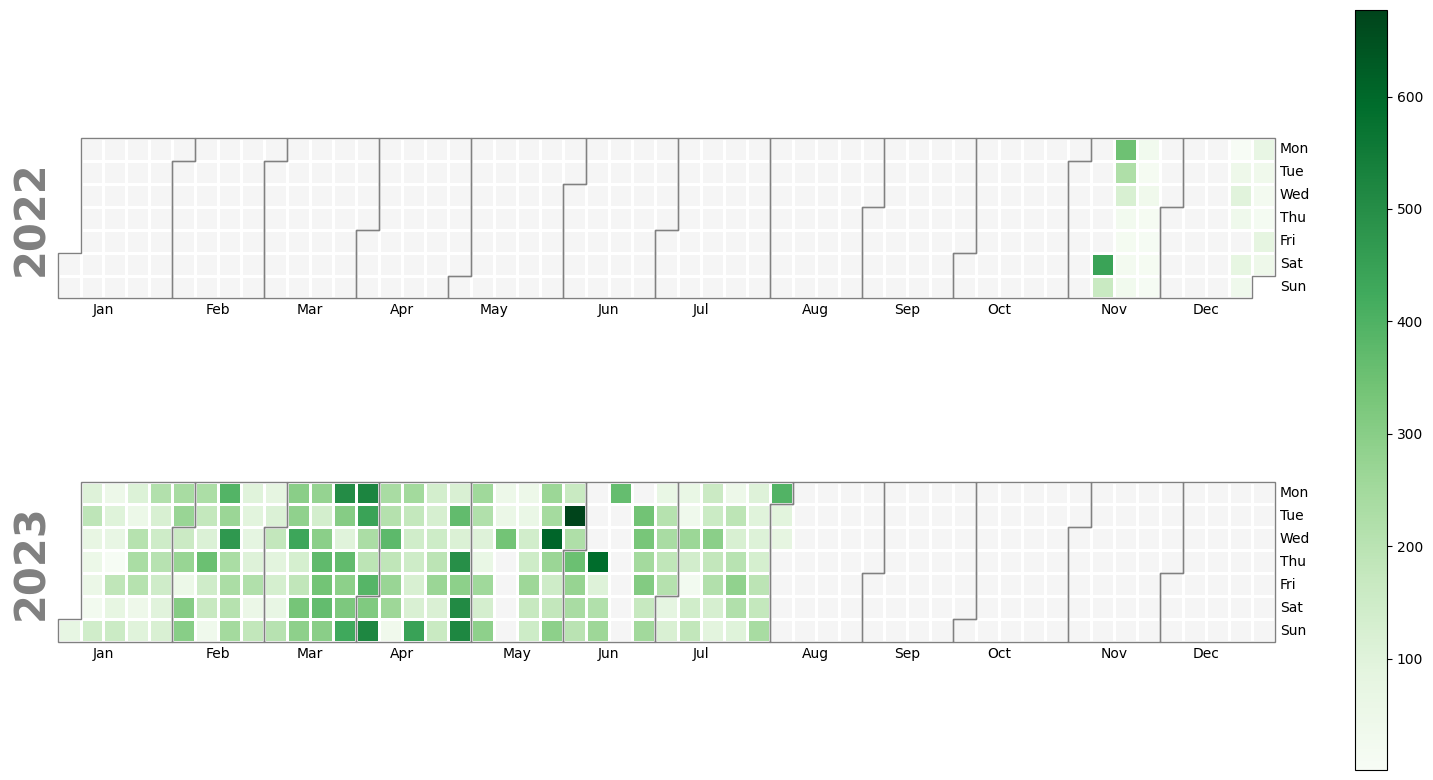

In [316]:
species = 'Torresian Crow'
month_start = dateutil.parser.parse('2023-07-01 00:00 +10:00')
month_end = month_start + timedelta(days=60)

bird_data = df_hours_peak.query('timestamp >= @month_start and timestamp < @month_end', engine='python')
bird_data_count = bird_data.shape[0]
bird_data_empty = bird_data.query('count == 0').shape[0]
bird_data = bird_data.query('common == @species', engine='python')

caldata = df.query('common == @species', engine='python').copy()
caldata = caldata.groupby(caldata.index.date).count()
caldata.index = pandas.to_datetime(caldata.index)
calplot.calplot(data=caldata['common'], how=None, cmap = 'Greens', figsize = (16, 8))


In [300]:

intensity_bins = {
    -1: "Silent",
    0: "Single",
    2: "Occasional",
    6: "Regular",
    10: "Intense",
    15: "Extreme",
    numpy.inf: "Inf"
}

data = bird_data.copy()
data = (
    data
    .assign(hod=lambda r: r['timestamp'].dt.hour)
    .assign(freq=lambda r: pandas.cut(r['count'], bins=list(intensity_bins.keys()), labels=list(intensity_bins.values())[:-1], right=True))
    .groupby(by=['freq', 'hod'])
    .size()
    .unstack(level='freq')
    .fillna(0)
    .assign(Silent=lambda df: bird_data_empty / bird_data_count)
    .sort_index(axis=1)
    .applymap(lambda x: (x / bird_data_count) * 100)
    .reindex([h for h in range(0, 24)], fill_value=0.0)
)


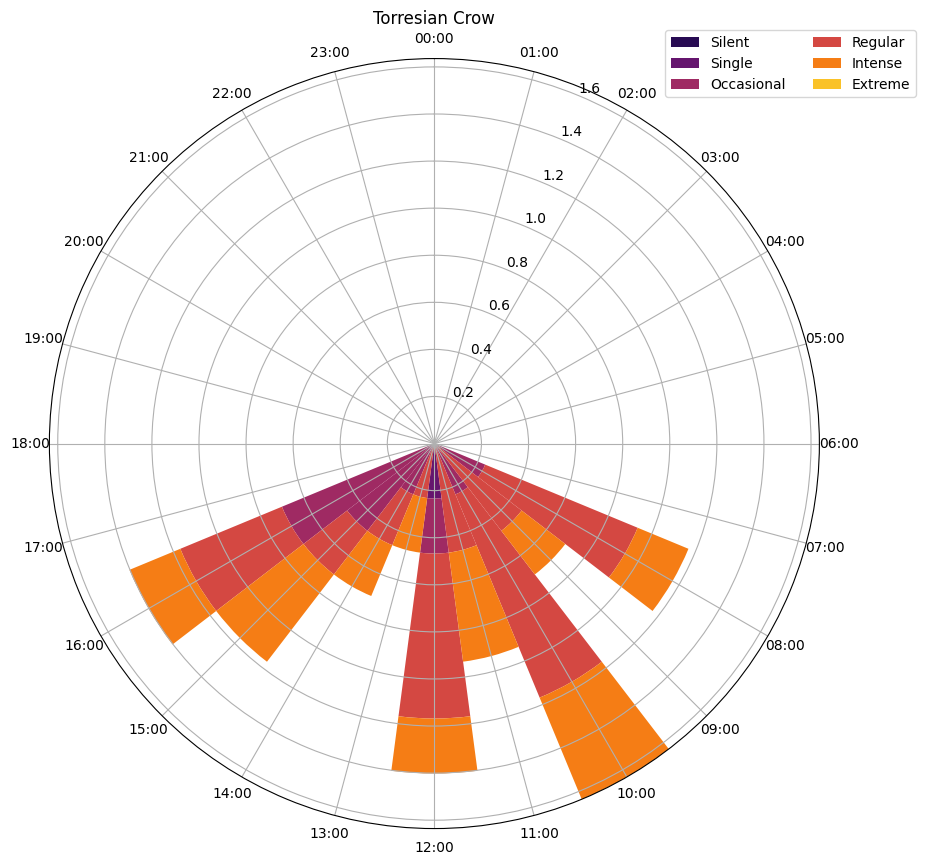

In [301]:

fig = clock_rose(data, species)


https://gist.github.com/phobson/41b41bdd157a2bcf6e14

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1600x800 with 2 Axes>,
 array([<Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


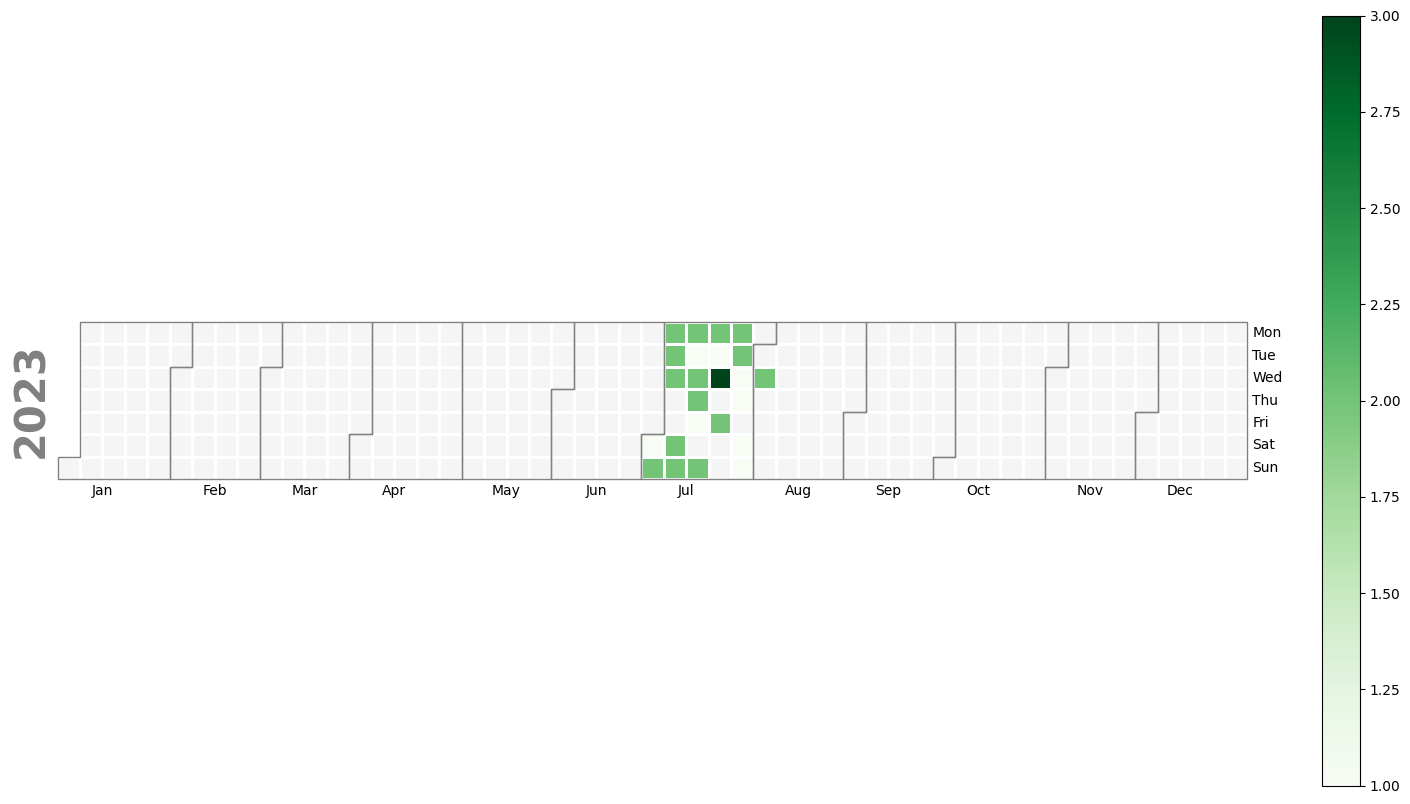